# Final Project Fall 2020 by Evaristus Mbanefo

Link to Training data
https://github.com/evambanefo/BIOF509_ML/tree/main/train

In [1]:
cd /Users/Eva/evambanefo/BIOF509_ML/train/

/Users/Eva/evambanefo/BIOF509_ML/train


In [2]:
#import all required tools
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# lets read the image
img=Image.open("img.jpeg")

In [4]:
img_path = 'img.jpeg'

In [5]:
# lets convert image object into array 
imageToMatrice = np.asarray(img) 

In [6]:
# lets printing shape of image 
print(imageToMatrice.shape)

(426, 640, 3)


In [7]:
# Load color image 
bgr_img = cv2.imread(img_path)

In [8]:
# lets Convert to grayscale
gray_img = cv2.cvtColor(imageToMatrice, cv2.COLOR_BGR2GRAY)

In [9]:
# Lets Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

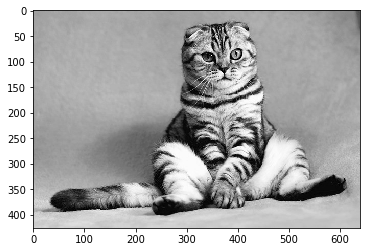

In [10]:
# Lets Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [11]:
#lets define filters
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [12]:
# Now Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

In [13]:
# Lets Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [14]:
#Nows lets define a convolution layer
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # Returns both layers
        return conv_x, activated_x
    
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [15]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

NotImplementedError: 

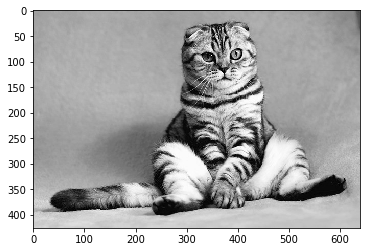

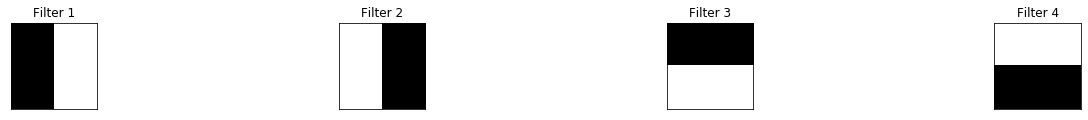

In [17]:
# Plot original image
plt.imshow(gray_img, cmap='gray')
# Visualize all of the filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)
# Visualize the output of a convolutional layer
viz_layer(conv_layer)

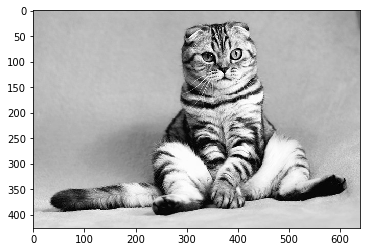

In [18]:
gray = cv2.cvtColor(imageToMatrice, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

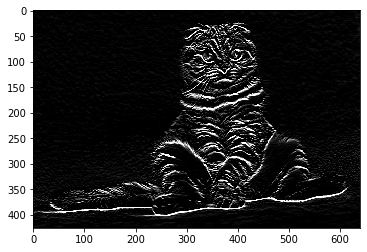

In [19]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image, cmap='gray')

In [20]:
viz_layer(activated_layer)

NameError: name 'activated_layer' is not defined